# Lab 3: Convolutional Neural Networks (CNNs)

In today's lab, we will explore the basics of Convolutional Neural Networks (CNNs) and implement a simple CNN model using PyTorch. We will work with the MNIST dataset, which consists of handwritten digits.

In [ ]:
# Verifying your installation and setup
# Make sure you have the necessary libraries installed
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available (Optional): {cuda_available}")


CUDA available (Optional): False


## Introduction to CNNs

Convolutional Neural Networks (CNNs) are a class of deep neural networks that are particularly effective for image classification tasks. They use convolutional layers to automatically learn spatial hierarchies of features from input images. Let's start by visualizing how CNNs work with the help of an interactive tool [CNN Explainer](https://poloclub.github.io/cnn-explainer/#explainer).

In [2]:
from IPython.display import IFrame
IFrame('https://poloclub.github.io/cnn-explainer/#explainer', width=800, height=700)

## Kernels and Convolutions

An input color image can be represented as a 3D tensor with dimensions corresponding to height, width, and color channels (RGB). A convolutional layer applies a set of filters (kernels) to the input image to produce feature maps. Each filter detects specific patterns such as edges, textures, or shapes. For the above example of a coffee cup, the CNN might learn to recognize features like the handle, the rim, and the liquid inside.

A kernel is applied to the input image by performing element-wise multiplication and summing the results, producing a feature map. This process is repeated across the entire image, allowing the network to learn spatial patterns. You could see how the convolution operation works in the [CNN Explainer](https://poloclub.github.io/cnn-explainer/#explainer) tool by clicking on the `conv_1_1` layer in the explainer. It will show you how the kernel slides over the input image and how the feature map is generated.

### Hyper parameters of a Convolutional Layer

There are three important parameters in a convolutional layer:
- **Kernel Size**: The dimensions of the filter (e.g., 3x3, 5x5).
- **Stride**: The number of pixels by which the filter moves across the image.
- **Padding**: The number of pixels added to the input image borders to maintain the spatial dimensions after convolution.

For example of a 5x5 RGB image with a 2x2 kernel, a stride of 1, and no padding, the output will be a 4x4 feature map.

In [4]:
import torch.nn as nn

conv1 = nn.Conv2d(1, 1, kernel_size=2, stride=1, padding=0)

x = torch.randn(1, 1, 5, 5)  # Example input tensor
output = conv1(x)
print(f"Output shape after Conv2d: {output.shape}")

Output shape after Conv2d: torch.Size([1, 1, 4, 4])


However, if we use a stride of 2, the output will be a 2x2 feature map. Padding can be used to control the spatial dimensions of the output feature map. For example, if we apply a padding of 1 to the input image, the output feature map will be a 3x3 feature map.

In [7]:
conv2 = nn.Conv2d(1, 1, kernel_size=2, stride=2, padding=1)
output = conv2(x)
print(f"Output shape after Conv2d with stride 2: {output.shape}")

Output shape after Conv2d with stride 2: torch.Size([1, 1, 3, 3])


### Exercise: Understanding Kernel Size, Stride, and Padding

Given the following scenario:

- You have a grayscale image represented as a tensor of shape `(1, 1, 6, 6)` (batch size 1, 1 channel, 6x6 pixels).
 - the input tensor `x` is defined as follows:
```python
import torch
x = torch.tensor([[[[1, 1, 1, 1, 1, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 0, 1, 1, 0, 1],
              [1, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1]]]], dtype=torch.float32)
```
- You want to apply a convolutional layer with the following parameters:
- You apply a convolutional layer with:
    - Kernel size: 3x3
    - Stride: 2
    - Padding: 1

**Questions:**

Please answer the following questions by coding in the provided cells:

1. What will be the shape of the output feature map after applying this convolution?
2. How does changing the stride from 2 to 1 affect the output shape?
3. What happens to the output shape if you remove the padding (set padding to 0)?

*Hint: Use the formula for calculating the output size of a convolutional layer:*

Try to answer these questions before running any code!

In [22]:
# Put your answer here


## Pooling Layers

Pooling layers are used to reduce the spatial dimensions of feature maps, which helps in reducing the number of parameters and computation in the network. There are two common types of pooling: max pooling and average pooling. Max pooling selects the maximum value from a region, while average pooling computes the average value.

### Max Pooling

The effect of max pooling is to downsample the feature map while retaining the most important features. For example, if we apply a max pooling layer with a kernel size of 2 and stride of 2 to a 4x4 feature map, the output will be a 2x2 feature map that retains the maximum values from each 2x2 region.

In [14]:
# An example of a max pooling layer
import torch.nn as nn
# Max pooling layer with a kernel size of 2 and stride of 2
pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
x_pool = torch.randn(1, 1, 4, 4)  # Example input tensor for pooling
output_pool = pooling_layer(x_pool)
print(f"Input: {x_pool}")
print(f"Output shape after MaxPool2d: {output_pool.shape}")
print(f"Output after MaxPool2d: {output_pool}")

Input: tensor([[[[ 0.6442, -1.1545, -0.4657,  0.0652],
          [-1.5673, -0.1590,  0.4910,  1.4602],
          [-0.4828,  1.3734,  1.1444, -1.2709],
          [ 1.4151,  2.1434, -0.3637,  0.9685]]]])
Output shape after MaxPool2d: torch.Size([1, 1, 2, 2])
Output after MaxPool2d: tensor([[[[0.6442, 1.4602],
          [2.1434, 1.1444]]]])


### Average Pooling

The average pooling layer works similarly to max pooling, but instead of taking the maximum value, it computes the average value from each region. This can be useful for smoothing the feature maps and reducing noise.

In [15]:
# An example of an average pooling layer
pooling_layer_avg = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
output_avg = pooling_layer_avg(x_pool)
print(f"Input for AvgPool2d: {x_pool}")
print(f"Output shape after AvgPool2d: {output_avg.shape}")
print(f"Output after AvgPool2d: {output_avg}")

Input for AvgPool2d: tensor([[[[ 0.6442, -1.1545, -0.4657,  0.0652],
          [-1.5673, -0.1590,  0.4910,  1.4602],
          [-0.4828,  1.3734,  1.1444, -1.2709],
          [ 1.4151,  2.1434, -0.3637,  0.9685]]]])
Output shape after AvgPool2d: torch.Size([1, 1, 2, 2])
Output after AvgPool2d: tensor([[[[-0.5592,  0.3877],
          [ 1.1123,  0.1196]]]])


### Exercise: Understanding Pooling Layers

Given the following scenario:

- You have a feature map represented as a tensor of shape `(1, 1, 6, 6)` (batch size 1, 1 channel, 6x6 pixels), for example, `x_pool` in the previous code cells.
    - The input tensor `x_pool` is defined as follows:
```python
import torch
x_pool = torch.tensor([[[[1, 1, 1, 1, 1, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 0, 1, 1, 0, 1],
              [1, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1]]]], dtype=torch.float32)
```
- You apply a pooling layer with:
    - Kernel size: 2x2
    - Stride: 2
    - Padding: 0

**Questions:**

Please answer the following questions by coding in the provided cells:

1. What will be the shape of the output feature map after applying max pooling to `x_pool`?
2. What values will be present in the output feature map after max pooling?
3. How would the output change if you use average pooling instead of max pooling?
4. What happens to the output shape if you change the stride from 2 to 1?

*Hint: Try to answer these questions before running any code! Then, use the provided pooling layers and `x_pool` tensor to verify your answers.*

In [ ]:
# put your answer here

# Building a Simple CNN Model

After understanding the basics of CNNs, we can build a simple CNN model using PyTorch. This model will consist of convolutional layers followed by activation functions, pooling layers, and finally, fully connected layers for classification.

In [35]:
# Let's build a simple CNN model
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer 1
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # 1 input channel, 16 output channels
        # Max pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Convolutional layer 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)  # 16 input channels, 32 output channels
        # Max pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layer 1
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Assuming input size is (1, 28, 28)
        # Fully connected layer 2 (output layer)
        self.fc2 = nn.Linear(128, 10)  # Output size for MNIST (10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## Model Architecture

The above code defines a simple CNN model with the following architecture details:
- **Convolutional Layer 1**: Applies 16 filters of size 3x3 with ReLU activation.
- **Max Pooling Layer 1**: Reduces the spatial dimensions by half using a 2x2 kernel and stride of 2.
- **Convolutional Layer 2**: Applies 32 filters of size 3x3 with ReLU activation
- **Max Pooling Layer 2**: Further reduces the spatial dimensions by half using a 2x2 kernel and stride of 2.
- **Fully Connected Layer 1**: Flattens the output and applies a linear transformation to produce 128 features.
- **Fully Connected Layer 2**: Applies a linear transformation to produce the final output with 10 classes (for MNIST digits 0-9).

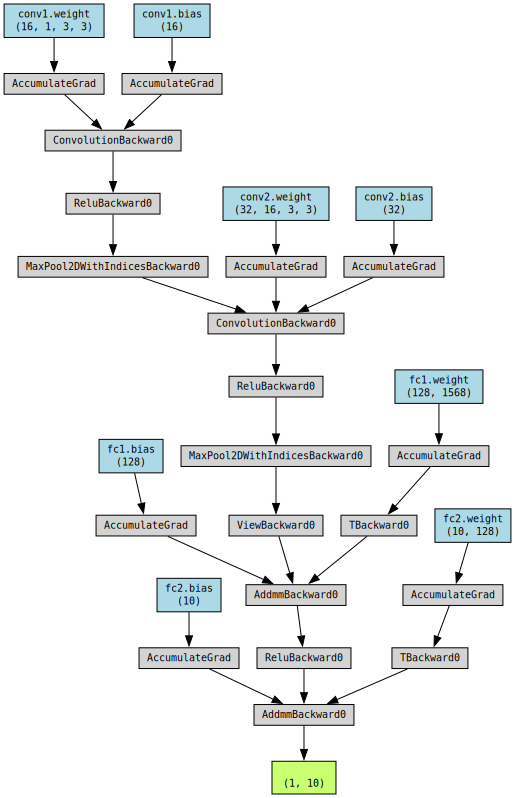

In [ ]:
from torchviz import make_dot
# Visualize the model architecture by passing a dummy input tensor with the expected input shape (1, 1, 28, 28)
make_dot(model(torch.randn(1, 1, 28, 28)), params=dict(list(model.named_parameters())))

## The Fashion MNIST Dataset

The Fashion MNIST dataset is a collection of images of clothing items, similar to the MNIST dataset of handwritten digits. It consists of 60,000 training images and 10,000 test images, each labeled with one of 10 classes (e.g., T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot).

To load the Fashion MNIST dataset, we can use the `torchvision` library, which provides convenient functions for downloading and transforming datasets. The dataset will be split into training and test sets, and we will apply necessary transformations such as normalization and data augmentation.

In [45]:
#define the label names for the Fashion MNIST dataset
label_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

### Data transformations and augmentation

To prepare the Fashion MNIST dataset for training, we will apply the following transformations:
- **Normalization**: Scale the pixel values to a range of [-1, 1]
- **Data Augmentation**: Apply random transformations such as rotation, translation, and flipping to increase the diversity of the training data.

In [41]:
import torchvision.transforms as transforms

# define the transformation to apply to the dataset
# Normalize the images to have mean 0.5 and standard deviation 0.5
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL images to tensors
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]

    # data augmentation
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),  # Randomly rotate images by 10 degrees
    transforms.RandomCrop(28, padding=4)  # Randomly crop images to 28x28 with padding of 4 pixels
])

### Loading the dataset with `torchvision.datasets`

`torchvision.datasets` provides a convenient way to load datasets like Fashion MNIST. We can specify the root directory, whether to load the training or test set, and apply the transformations we defined earlier.

In [58]:
import torchvision.datasets as datasets


# Load the Fashion MNIST train and test datasets by toggling the `train` parameter
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
# Create data loaders for the train and test datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

After loading the dataset, we can visualize some sample images along with their labels to understand the data better. This will help us in training our CNN model effectively. Let's visualize a batch of images from the training dataset.

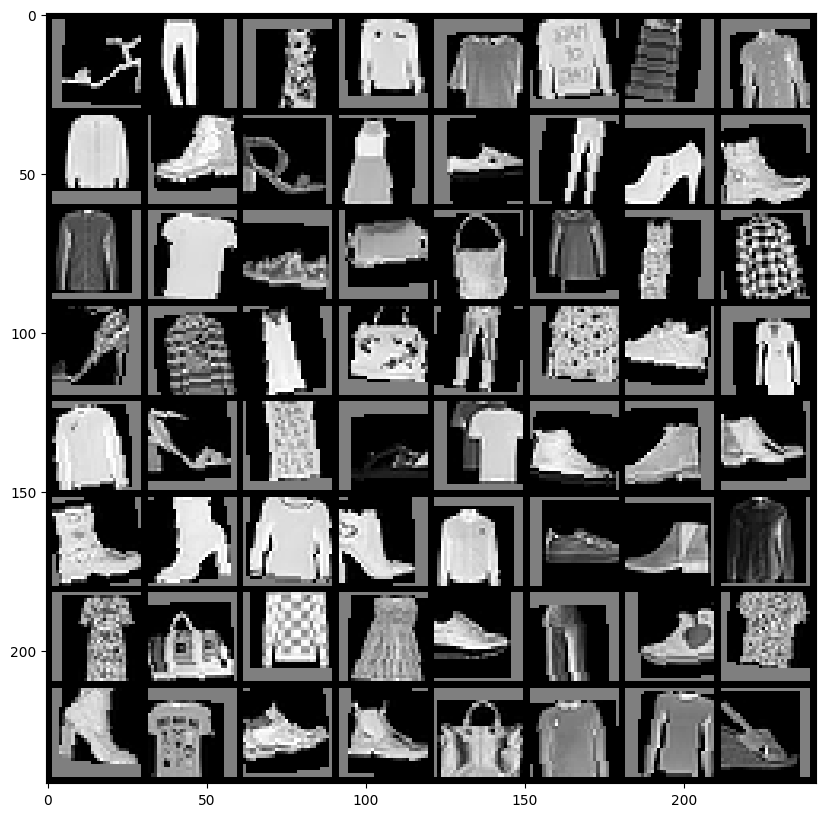

In [61]:
from torchvision.utils import make_grid

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Visualize a batch of images by creating a grid of images and unnormalizing them
grid_img = make_grid(images, nrow=8, padding=2, normalize=True)
plt.figure(figsize=(10, 10))
plt.imshow(grid_img.permute(1, 2, 0).numpy())

We could also loop through the dataset and visualize each image along with its label. This will give us a better understanding of the dataset and help us identify any potential issues with the data.

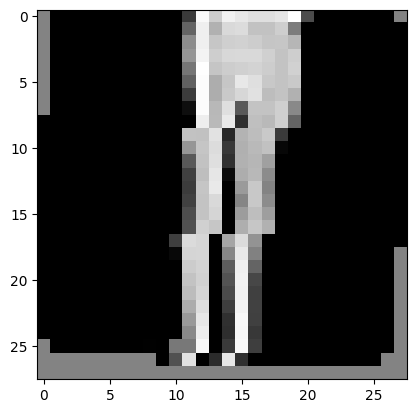

Label: Trouser


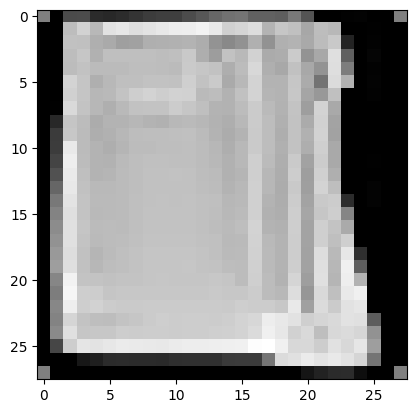

Label: Bag


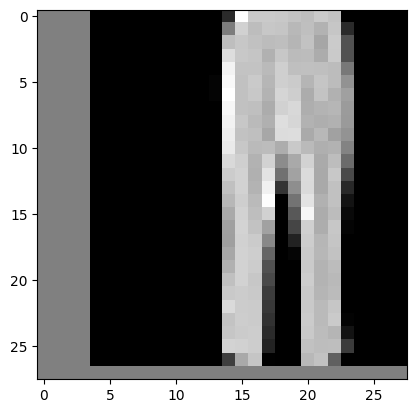

Label: Trouser


In [ ]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()

# Show the first 3 images and their labels
for i in range(3):
    imshow(images[i])
    print(f'Label: {label_names[labels[i].item()]}')

# Training the CNN Model

We will now train our CNN model on the Fashion MNIST dataset. The training process involves feeding the training data through the model, calculating the loss, and updating the model parameters using backpropagation.

We usually define some hyperparameters for training, such as the number of epochs and learning rate. The training loop will iterate over the training dataset for a specified number of epochs.

In [62]:
num_epochs = 5
learning_rate = 0.001

## Define the loss function and optimizer

We will use the `CrossEntropyLoss` as our loss function, which is suitable for multi-class classification tasks. The optimizer will be `Adam`, which is an adaptive learning rate optimization algorithm that works well for training deep neural networks.

In [63]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Training Loop

The training loop will iterate over the training dataset for a specified number of epochs. In each epoch, we will:
1. Set the model to training mode.
2. Iterate over the training data in batches.
3. Forward pass: Pass the input images through the model to get predictions.
4. Calculate the loss using the predicted outputs and true labels.
5. Backward pass: Compute gradients and update the model parameters using the optimizer.    

In [55]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5], Loss: 0.8087
Epoch [2/5], Loss: 0.5760
Epoch [3/5], Loss: 0.5113
Epoch [4/5], Loss: 0.4701
Epoch [5/5], Loss: 0.4396


## Simple validation and testing

After training the model, we will evaluate its performance on the validation and test datasets. This will help us understand how well the model generalizes to unseen data.

In [64]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the model on the test dataset: {100 * correct / total:.2f}%')

Accuracy of the model on the test dataset: 83.89%


# Using pre-trained CNN models for image classification

In this section, we will explore how to use pre-trained CNN models for image classification tasks. Pre-trained models are trained on large datasets and can be fine-tuned for specific tasks, which saves time and computational resources.

Training deep learning models from scratch requires large amount of computational power and time. Instead, one can use the model trained on other datasets (or even tasks) as a starting point. Pre-trained models are neural network models that have been trained on large datasets, for example, the ImageNet. During the past decade, many deep learning models have been developed:

![Model timeline for pre-trained CNN models](https://raw.githubusercontent.com/jakeykj/labfigs/main/Model_Timeline.png)

Besides datasets, `torchvision` provides a variety of pre-trained models that can be used for image classification tasks. We will try out the **AlexNet** model, which is a well-known CNN architecture that has been widely used for image classification tasks.

## AlexNet

The AlexNet is the name of a convolutional neural network, invented by Alex Krizhevsky, Ilya Sutskever and Geoffrey E. Hinton in 2012. It has a large impact on the application of deep learning to computer vision tasks. The AlexNet won the 2012 ImageNet Large Scale Visual Recognition Challenge with a top-5 error of 15.3%. The highlights of the Alexnet are the use of ReLU activation function and dropout, and the depth of the layers.

![](https://raw.githubusercontent.com/jakeykj/labfigs/main/AlexNet.png)



## The CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60,000 images divided into 10 classes, with 6000 images per class. The classes include airplanes, automobiles, cats and so on. There are 50,000 training samples and 10000 test samples. Each image is represented by 32x32 pixels (1024 pixels) in red, green and blue channels. See https://www.cs.toronto.edu/~kriz/cifar.html for more introduction.

![Some examples of the images in CIFAR-10 dataset.](https://raw.githubusercontent.com/jakeykj/labfigs/main/cifar.png)



## Let's Code It!

After understanding the basics of **AlexNet** and the **CIFAR-10** dataset, we can now load the dataset and the pre-trained AlexNet model using PyTorch.

### (1) Load the datasets and the pretrained model

In [67]:
# Apart from pytorch, we also need to import torchvision and Pillow packages
from torchvision.datasets import CIFAR10, ImageNet
from torchvision import models, transforms

from PIL import Image

In [68]:
# The model is pre-trained with the ImageNet dataset, thus normalization of input is required.
# We first resize the input images, and convert the image to tensor format, and lastly normalize the
# input images using the mean and std specified by the pre-trained model we used.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# After defining the transformation needed, we can now load and transform the datasets.
cifar10_train = CIFAR10('./cifar10', download=True, transform=transform)
cifar10_test = CIFAR10('./cifar10', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:15<00:00, 10.9MB/s] 


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [69]:
# We can now load the pre-trained AlexNet model.
alexnet = models.alexnet(pretrained=True)  # load the pre-trained model.

/home/kenny/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kenny/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/kenny/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 44.7MB/s] 


In [84]:
# The model is pre-trained with ImageNet dataset, so let's download the class
# label mapping. This tells us what each output means.
!curl -Lo 'imagenet_classes.txt' https://raw.githubusercontent.com/pytorch/hub/refs/heads/master/imagenet_classes.txt

# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10472  100 10472    0     0  19609      0 --:--:-- --:--:-- --:--:-- 19610


In [82]:
# Let's prepare some images. First create a folder to store the images.
import os
if not os.path.exists('custom_images'):
    os.makedirs('custom_images')

# the links and file name of the images. You can add your own ones here.
# All images below are downloaded from https://www.freeimages.com
url_prefix = 'https://raw.githubusercontent.com/jakeykj/labfigs/main/custom_images/'

for i in range(1, 11):
    img_name = 'image{}.jpeg'.format(i)
    img_path = os.path.join('custom_images', img_name)
    img_url = url_prefix + img_name
    !curl -Lo {img_path} {img_url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  450k  100  450k    0     0   486k      0 --:--:-- --:--:-- --:--:--  485k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  268k  100  268k    0     0   309k      0 --:--:-- --:--:-- --:--:--  309k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1196k  100 1196k    0     0  1040k      0  0:00:01  0:00:01 --:--:-- 1040k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2398k  100 2398k    0     0  1866k      0  0:00:01  0:00:01 --:--:-- 1867k
  % Total    % Received % Xferd  Average Speed   Tim

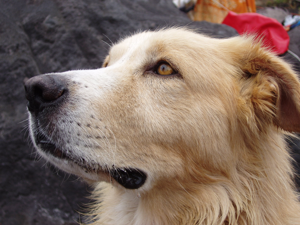

Tibetan mastiff     (probability=0.32)
golden retriever    (probability=0.23)
Great Pyrenees      (probability=0.17)
collie              (probability=0.04)
white wolf          (probability=0.03)





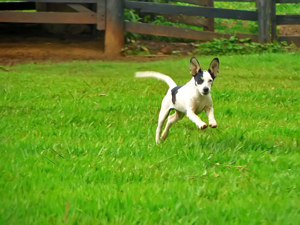

toy terrier         (probability=0.26)
American Staffordshire terrier(probability=0.21)
Italian greyhound   (probability=0.09)
papillon            (probability=0.04)
whippet             (probability=0.04)





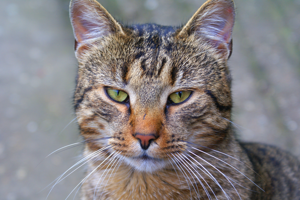

tiger cat           (probability=0.67)
tabby               (probability=0.31)
Egyptian cat        (probability=0.02)
lens cap            (probability=0.00)
lynx                (probability=0.00)





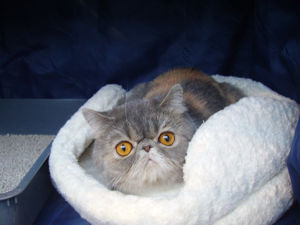

Persian cat         (probability=0.35)
ping-pong ball      (probability=0.08)
cougar              (probability=0.07)
tabby               (probability=0.04)
tiger cat           (probability=0.03)





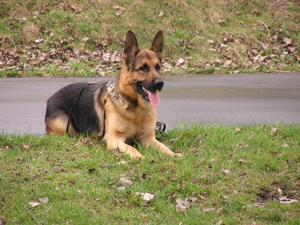

German shepherd     (probability=0.75)
malinois            (probability=0.06)
kelpie              (probability=0.04)
dingo               (probability=0.02)
Pembroke            (probability=0.01)





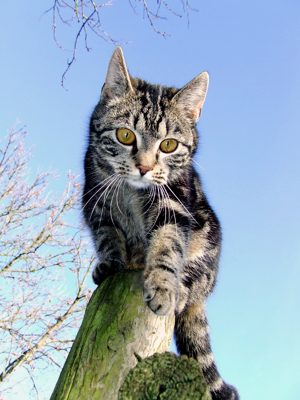

tabby               (probability=0.85)
tiger cat           (probability=0.09)
Egyptian cat        (probability=0.05)
tiger               (probability=0.01)
lynx                (probability=0.00)





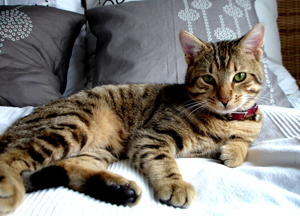

tabby               (probability=0.74)
tiger cat           (probability=0.12)
Egyptian cat        (probability=0.09)
tiger               (probability=0.02)
mouse               (probability=0.01)





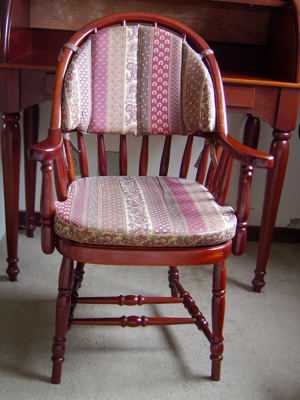

dining table        (probability=0.32)
rocking chair       (probability=0.31)
studio couch        (probability=0.12)
cradle              (probability=0.08)
crib                (probability=0.04)





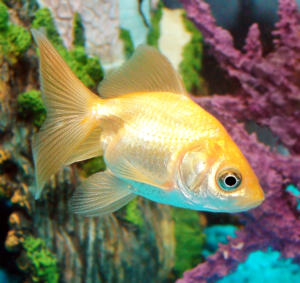

goldfish            (probability=1.00)
puffer              (probability=0.00)
rock beauty         (probability=0.00)
axolotl             (probability=0.00)
tench               (probability=0.00)





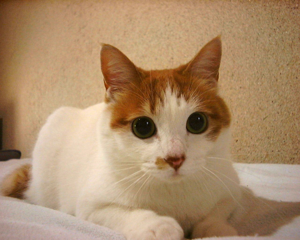

toilet tissue       (probability=0.19)
tiger cat           (probability=0.19)
plastic bag         (probability=0.12)
window screen       (probability=0.08)
tub                 (probability=0.04)





In [85]:
# Now, let's use the pre-trained AlexNet to classify the images.

# First, we set the model to evaluation mode.
alexnet.eval()

for filename in os.listdir("custom_images"):  # loop through the images in the folder
    # open the image
    with Image.open(os.path.join("custom_images", filename)) as img:
        # Show the image with a proper size
        scale = 300 / img.width
        display(img.resize((int(img.width*scale), int(img.height*scale))))

        # make prediction of class probabilities
        img_transformed = transform(img)
        batch_tensor = img_transformed.unsqueeze(0)
        output = alexnet(batch_tensor)
        probabilities = output[0].softmax(dim=0)

        # Show top five categories of this image
        top5_prob, top5_catid = torch.topk(probabilities, 5)
        for i in range(top5_prob.size(0)):
            print('{:20}(probability={:.2f})'.format(categories[top5_catid[i]],
                                                          top5_prob[i].item()))
        print('\n\n')

### ★ Try It Out Yourself!
You can see from the above predictions that some are correct but some others are wrong. AlexNet was developed in 2012, almost ten years ago. If you use a newer model, like DenseNet, you will see a difference. To use DenseNet, you can modify the codes where you loaded the pre-trained model.

**A tip**: you can construct a pretrained DenseNet by calling
`models.densenet161(pretrained=True)`

Try it out! *Don't worry about messing it up, you can undo modifications. In the worst case, you can always download/clone another copy of this notebook and start afresh :)*

In [ ]:
# Put your code here

### (3) Classify CIFAR-10 images

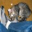

Ground-truth label: cat
fox squirrel        (probability=0.11)
platypus            (probability=0.06)
nipple              (probability=0.05)
triceratops         (probability=0.03)
guenon              (probability=0.03)





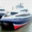

Ground-truth label: ship
moving van          (probability=0.16)
container ship      (probability=0.05)
cassette            (probability=0.03)
waffle iron         (probability=0.03)
oil filter          (probability=0.02)





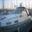

Ground-truth label: ship
amphibian           (probability=0.23)
moving van          (probability=0.14)
cassette player     (probability=0.04)
grey whale          (probability=0.04)
yawl                (probability=0.03)





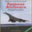

Ground-truth label: airplane
safety pin          (probability=0.07)
can opener          (probability=0.05)
cleaver             (probability=0.04)
iron                (probability=0.04)
cassette            (probability=0.04)





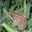

Ground-truth label: frog
fox squirrel        (probability=0.11)
dhole               (probability=0.07)
three-toed sloth    (probability=0.07)
frilled lizard      (probability=0.04)
titi                (probability=0.03)





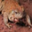

Ground-truth label: frog
redbone             (probability=0.09)
orangutan           (probability=0.08)
patas               (probability=0.08)
macaque             (probability=0.05)
red fox             (probability=0.04)





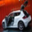

Ground-truth label: automobile
chain saw           (probability=0.26)
revolver            (probability=0.15)
power drill         (probability=0.06)
muzzle              (probability=0.04)
whistle             (probability=0.03)





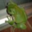

Ground-truth label: frog
milk can            (probability=0.12)
orangutan           (probability=0.04)
vine snake          (probability=0.04)
sorrel              (probability=0.03)
fox squirrel        (probability=0.03)





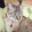

Ground-truth label: cat
wire-haired fox terrier(probability=0.07)
patas               (probability=0.06)
Eskimo dog          (probability=0.04)
Sussex spaniel      (probability=0.04)
keeshond            (probability=0.04)





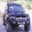

Ground-truth label: automobile
moving van          (probability=0.15)
oil filter          (probability=0.11)
bulletproof vest    (probability=0.06)
affenpinscher       (probability=0.06)
cassette player     (probability=0.05)





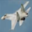

Ground-truth label: airplane
wire-haired fox terrier(probability=0.10)
toy terrier         (probability=0.05)
Arctic fox          (probability=0.05)
Sealyham terrier    (probability=0.05)
space shuttle       (probability=0.04)





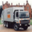

Ground-truth label: truck
moving van          (probability=0.97)
trailer truck       (probability=0.01)
garbage truck       (probability=0.00)
ambulance           (probability=0.00)
passenger car       (probability=0.00)





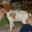

Ground-truth label: dog
English foxhound    (probability=0.45)
Walker hound        (probability=0.23)
Japanese spaniel    (probability=0.05)
wire-haired fox terrier(probability=0.04)
Brittany spaniel    (probability=0.03)





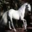

Ground-truth label: horse
colobus             (probability=0.30)
Japanese spaniel    (probability=0.24)
Madagascar cat      (probability=0.02)
keeshond            (probability=0.02)
African hunting dog (probability=0.02)





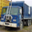

Ground-truth label: truck
moving van          (probability=0.49)
thresher            (probability=0.07)
trailer truck       (probability=0.05)
passenger car       (probability=0.05)
oil filter          (probability=0.03)





In [86]:
# Similarly, let's get a few samples from CIFAR-10 test set,
# visualize them, and make predictions using AlexNet

tensor_to_pil_image = transforms.ToPILImage()

for i in range(15):
    # get data from the ".data" attribute will retrieve the raw image (without transformation)
    img_raw = cifar10_test.data[i]
    img = Image.fromarray(img_raw)
    display(img)

    # make prediction of class probabilities
    img_transformed, label = cifar10_test[i]  # get data in this form will retrieve the transformed tensor
    batch_tensor = img_transformed.unsqueeze(0)
    output = alexnet(batch_tensor)
    probabilities = output[0].softmax(dim=0)

    # Show the ground truth label
    print('Ground-truth label:', cifar10_test.classes[label])

    # Show top five categories of this image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    for i in range(top5_prob.size(0)):
        print('{:20}(probability={:.2f})'.format(categories[top5_catid[i]],
                                                 top5_prob[i].item()))
    print('\n\n')


### (4) Finetuning

As we can see from above examples, the predictions are not even remotly close to the ground truth. The main reason is that the the CIFAR-10 data is very much different from the ImageNet because it its resolution is so low.

We often encounter such senarios in real-world problems, that the data used to pre-train the model and the real test data are very different. One solution is to **finetune the model**, i.e., to tweak the parameters of an already-trained model so that it adpats to the new task or dataset that we desire to tackle/use.

In CNN models, it is commonly believed that initial layers could learn very general features and later ones learn features that are more specific to the task/data that are used to train the model. So, we want to keep the initial layers *frozen* and update the parameters of later layers.


Let's see how we can achieve it in this section. For simplicity, we only finetune the final layer of AlexNet.

In [87]:
# We need to import some more modules for training/finetuning
from torch.utils.data import random_split, DataLoader
from torch.optim import Adam

In [88]:
# First we creat an intance of the network to be finetuned
model_ft = models.alexnet(pretrained=True)

# "Freeze" the model by setting requires_grad to False for all parameters,
#   so that the gradients of all parameters will not be computed during
#   backpropagation. By doing this, the model parameters will not be updated
#   during finetuning.
for param in model_ft.parameters():
    param.requires_grad = False

# Recall our target: we would like to tweak the parameters of the last layer.
#   So, let's replace it with a new layer. The last layer can be indexed by 6.
num_ftrs = model_ft.classifier[6].in_features  # get input size to the final layer
# replace it with a new linear layer with ten output classes (CIFAR-10 dataset).
model_ft.classifier[6] = nn.Linear(num_ftrs, 10)

/home/kenny/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kenny/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [89]:
# Construct training, validation, and test dataloaders. Dataloaders are objects
#   that could yield data in a batch.

# We use 10k images for training and 3k validation set
train_set, val_set, _ = torch.utils.data.random_split(cifar10_train, [10000, 3000, 37000])

train_loader =  DataLoader(train_set, batch_size=128)
validation_loader =  DataLoader(val_set, batch_size=128)

In [90]:
# Detect if we have a GPU available. For Colab users, you can use GPU. The option
#   can be found in the meun `Runtime -> Change runtime type -> Hardware accelerator`
#   select GPU, then click "Save" button.

# Note that,
#   - GPU is optional, but it will make the finetuning faster. Using only CPU is also good.
#   - If you change the runtime type, you will need to run the notebook from the first cell.
#      (you are allocated with a new runtime VM, the files you downloaded and uploaded will
#       not be there; you need to do them again.)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device in use:', str(device))

Device in use: cpu


In [91]:
# Send the model to the specified device
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in finetuning, i.e.,
#   the parameters with requires_grad is True.
params_to_update = []
print("Params to learn:")
for name, param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

# Create an Adam optimizer with the gathered parameters
optimizer_ft = Adam(params_to_update, lr=0.0001)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [92]:
# We use the cross entropy as loss function
criterion = nn.CrossEntropyLoss()

In [95]:
import time
from copy import deepcopy

num_epochs = 10

since = time.time()

# record the historical and the best accuracy.
val_acc_history = []
best_acc = 0.0
best_model_wts = deepcopy(model_ft.state_dict())

for epoch in range(num_epochs):
    tic = time.time()
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-' * 15)

    # phase one: training.
    model_ft.train() # set the model to training mode
    running_loss = 0
    running_corrects = 0

    # iterate over training subset
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # set the parameter gradients to zero
        optimizer_ft.zero_grad()

        # forward pass: get prediction and compute loss
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)

        # backward pass: compute gradients
        loss.backward()

        # update parameters
        optimizer_ft.step()

        # get the predicted class indices
        _, preds = torch.max(outputs, 1)

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    # The training phase in this epoch is done. Compute the statistics.
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    print('Training Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    # phase two: validation.
    model_ft.eval()   # set the model to evaluation mode
    running_loss = 0.0
    running_corrects = 0

    # computing gradient is not necessary in the validation phase.
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # get prediction and compute loss
            outputs = model_ft(inputs)
            loss = criterion(outputs, labels)

            # get the predicted class indices
            _, preds = torch.max(outputs, 1)

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    # The evaluation phase in this epoch is done. Compute the statistics.
    epoch_loss = running_loss / len(validation_loader.dataset)
    epoch_acc = running_corrects.double() / len(validation_loader.dataset)
    print('Validation Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    # check if the performance improves, copy the model if yes.
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = deepcopy(model_ft.state_dict())
    val_acc_history.append(epoch_acc)
    print('Time: {:.1f}s'.format(time.time()-tic))
    print('='*15)
    print()

time_elapsed = time.time() - since
print('Finetuning complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best validation Acc: {:4f}'.format(best_acc))

# load the best model weights
model_ft.load_state_dict(best_model_wts)

Epoch 1/10
---------------
Training Loss: 1.6066 Acc: 0.5146
Validation Loss: 1.1514 Acc: 0.6930
Time: 115.6s

Epoch 2/10
---------------
Training Loss: 1.0380 Acc: 0.6953
Validation Loss: 0.9094 Acc: 0.7363
Time: 133.9s

Epoch 3/10
---------------
Training Loss: 0.8867 Acc: 0.7248
Validation Loss: 0.8086 Acc: 0.7560
Time: 143.0s

Epoch 4/10
---------------
Training Loss: 0.8112 Acc: 0.7393
Validation Loss: 0.7513 Acc: 0.7623
Time: 148.1s

Epoch 5/10
---------------
Training Loss: 0.7558 Acc: 0.7566
Validation Loss: 0.7142 Acc: 0.7717
Time: 151.6s

Epoch 6/10
---------------
Training Loss: 0.7240 Acc: 0.7599
Validation Loss: 0.6875 Acc: 0.7777
Time: 154.7s

Epoch 7/10
---------------
Training Loss: 0.6887 Acc: 0.7711
Validation Loss: 0.6656 Acc: 0.7773
Time: 157.0s

Epoch 8/10
---------------
Training Loss: 0.6722 Acc: 0.7795
Validation Loss: 0.6486 Acc: 0.7827
Time: 158.6s

Epoch 9/10
---------------
Training Loss: 0.6582 Acc: 0.7800
Validation Loss: 0.6352 Acc: 0.7837
Time: 160.5s

E

<All keys matched successfully>

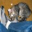

Ground-truth label: cat
cat                 (probability=0.61)
ship                (probability=0.14)
dog                 (probability=0.10)
airplane            (probability=0.04)
frog                (probability=0.03)





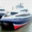

Ground-truth label: ship
ship                (probability=0.55)
automobile          (probability=0.35)
airplane            (probability=0.06)
truck               (probability=0.05)
bird                (probability=0.00)





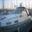

Ground-truth label: ship
ship                (probability=0.87)
automobile          (probability=0.11)
airplane            (probability=0.02)
truck               (probability=0.00)
bird                (probability=0.00)





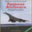

Ground-truth label: airplane
ship                (probability=0.45)
airplane            (probability=0.37)
truck               (probability=0.08)
automobile          (probability=0.04)
bird                (probability=0.03)





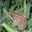

Ground-truth label: frog
frog                (probability=0.95)
deer                (probability=0.04)
cat                 (probability=0.00)
bird                (probability=0.00)
dog                 (probability=0.00)





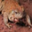

Ground-truth label: frog
frog                (probability=0.78)
cat                 (probability=0.09)
dog                 (probability=0.09)
deer                (probability=0.03)
bird                (probability=0.01)





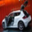

Ground-truth label: automobile
automobile          (probability=0.95)
truck               (probability=0.03)
horse               (probability=0.01)
cat                 (probability=0.00)
airplane            (probability=0.00)





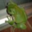

Ground-truth label: frog
frog                (probability=0.43)
deer                (probability=0.28)
bird                (probability=0.15)
cat                 (probability=0.08)
horse               (probability=0.04)





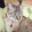

Ground-truth label: cat
cat                 (probability=0.83)
dog                 (probability=0.12)
frog                (probability=0.01)
horse               (probability=0.01)
bird                (probability=0.01)





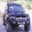

Ground-truth label: automobile
automobile          (probability=0.75)
truck               (probability=0.22)
ship                (probability=0.01)
frog                (probability=0.01)
airplane            (probability=0.00)





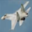

Ground-truth label: airplane
airplane            (probability=0.83)
ship                (probability=0.04)
dog                 (probability=0.04)
cat                 (probability=0.03)
bird                (probability=0.03)





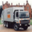

Ground-truth label: truck
truck               (probability=1.00)
automobile          (probability=0.00)
ship                (probability=0.00)
airplane            (probability=0.00)
horse               (probability=0.00)





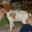

Ground-truth label: dog
dog                 (probability=0.65)
cat                 (probability=0.18)
horse               (probability=0.13)
deer                (probability=0.02)
bird                (probability=0.01)





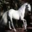

Ground-truth label: horse
horse               (probability=0.80)
cat                 (probability=0.06)
dog                 (probability=0.06)
truck               (probability=0.02)
automobile          (probability=0.02)





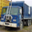

Ground-truth label: truck
truck               (probability=0.99)
automobile          (probability=0.00)
airplane            (probability=0.00)
horse               (probability=0.00)
ship                (probability=0.00)





In [96]:
# Let's try to predict the CIFAR-10 image labels again, this time we use the
#   finetuned model.

tensor_to_pil_image = transforms.ToPILImage()

for i in range(15):
    # get data from the ".data" attribute will retrieve the raw image (without transformation)
    img_raw = cifar10_test.data[i]
    img = Image.fromarray(img_raw)
    display(img)

    # make prediction of class probabilities
    img_transformed, label = cifar10_test[i]  # get data in this form will retrieve the transformed tensor
    batch_tensor = img_transformed.unsqueeze(0).to(device)
    output = model_ft(batch_tensor)  # change to finetuned model
    probabilities = output[0].softmax(dim=0)

    # Show the ground truth label
    print('Ground-truth label:', cifar10_test.classes[label])

    # Show top five categories of this image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    for i in range(top5_prob.size(0)):
        print('{:20}(probability={:.2f})'.format(cifar10_test.classes[top5_catid[i]],
                                                 top5_prob[i].item()))
    print('\n\n')


We can see from the output that the finetuned model now makes much more correct predictions than wrong ones. Due to time limit, we only finetuned it for 10 epochs. If you have more time, you can increase the number of epochs and try to visualize more samples to see how does it look like.